In [28]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Lade den Datensatz
df = pd.read_csv('C:/Users\heppl/DS Projehtarbeit/Data/day.csv')

# Spalten umbenennen
df = df.rename(columns={'dteday': 'date', 'mnth': 'month', 'cnt': 'distribution', 'hr': 'hour', 'yr': 'year'})

# Zeige die ersten Zeilen des Datensatzes
print(df.head())



   instant        date  season  year  month  holiday  weekday  workingday  \
0        1  2011-01-01       1     0      1        0        6           0   
1        2  2011-01-02       1     0      1        0        0           0   
2        3  2011-01-03       1     0      1        0        1           1   
3        4  2011-01-04       1     0      1        0        2           1   
4        5  2011-01-05       1     0      1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

   distribution  
0           985  
1           801  
2          134

In [29]:
# Zeige die grundlegenden Informationen zum Datensatz
print(df.info())

# Statistiken der numerischen Spalten anzeigen
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   date          731 non-null    object 
 2   season        731 non-null    int64  
 3   year          731 non-null    int64  
 4   month         731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   weekday       731 non-null    int64  
 7   workingday    731 non-null    int64  
 8   weathersit    731 non-null    int64  
 9   temp          731 non-null    float64
 10  atemp         731 non-null    float64
 11  hum           731 non-null    float64
 12  windspeed     731 non-null    float64
 13  casual        731 non-null    int64  
 14  registered    731 non-null    int64  
 15  distribution  731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season        year       mont

In [30]:
# Fehlende Werte prüfen
print(df.isnull().sum())
df = df.dropna()

instant         0
date            0
season          0
year            0
month           0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
distribution    0
dtype: int64


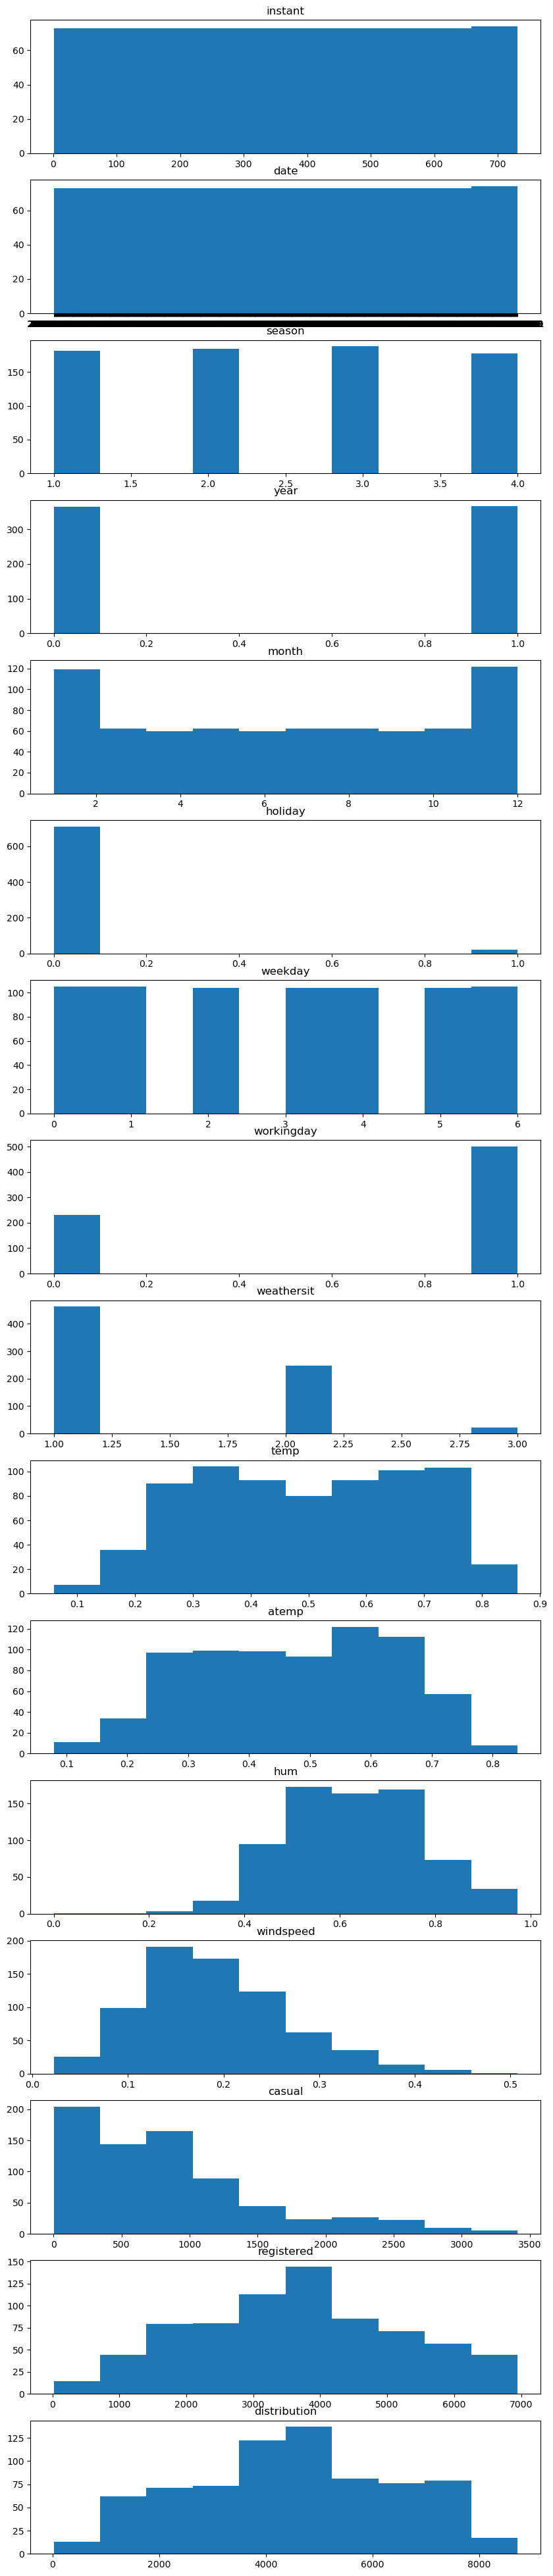

In [31]:
fig, ax = plt.subplots(df.shape[1], 1, figsize=(10, 50))
for i, column in enumerate(df.columns):
    ax[i].hist(df[column])
    ax[i].set_title(column)

c:\Users\heppl\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


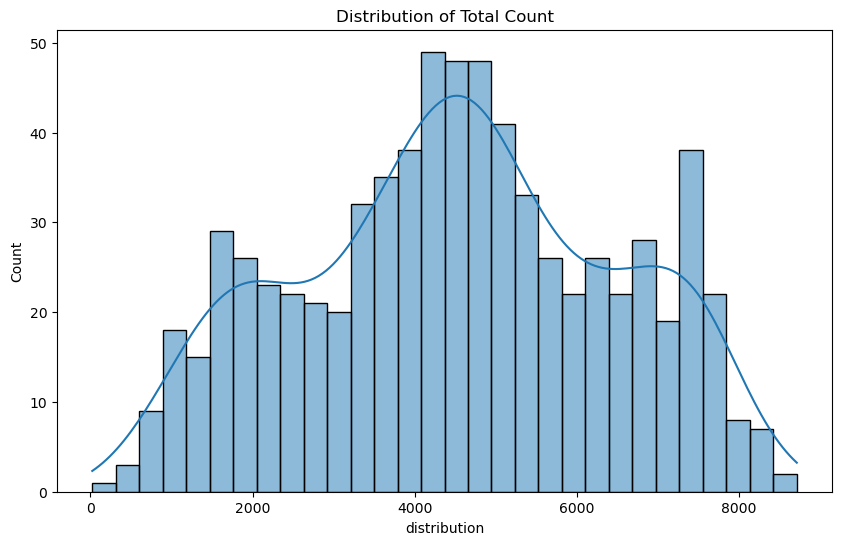

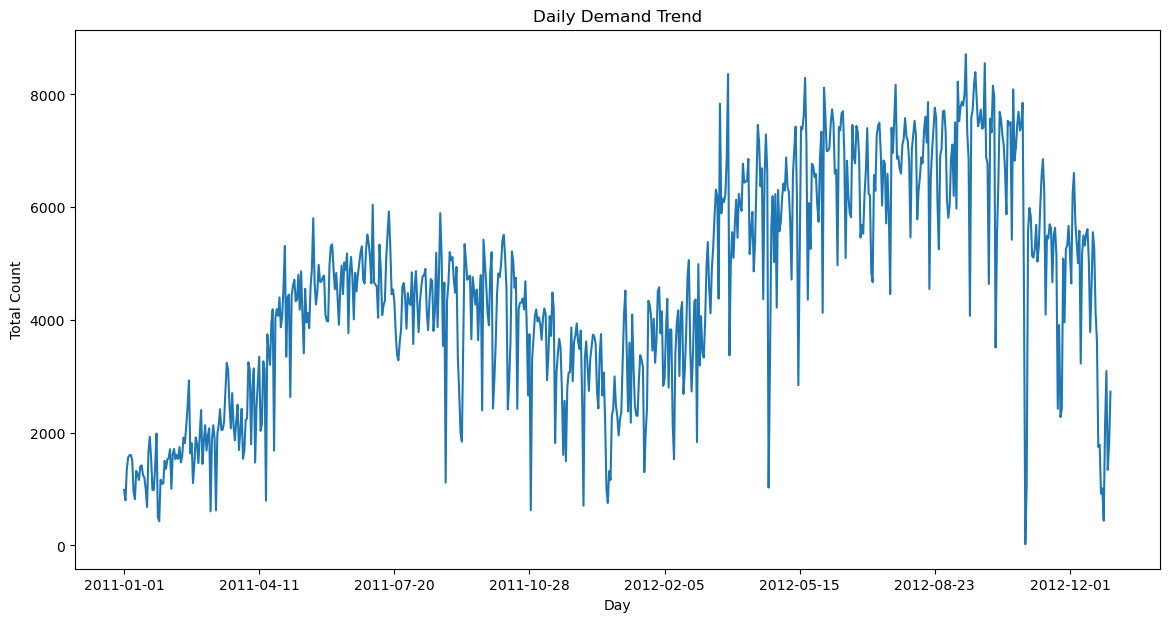

In [32]:
# erteilung der Zielvariable visualisieren
plt.figure(figsize=(10, 6))
sns.histplot(df['distribution'], bins=30, kde=True)
plt.title('Distribution of Total Count')
plt.show()

# Trend über die Zeit visualisieren
plt.figure(figsize=(14, 7))
df.groupby('date')['distribution'].sum().plot()
plt.title('Daily Demand Trend')
plt.xlabel('Day')
plt.ylabel('Total Count')
plt.show()

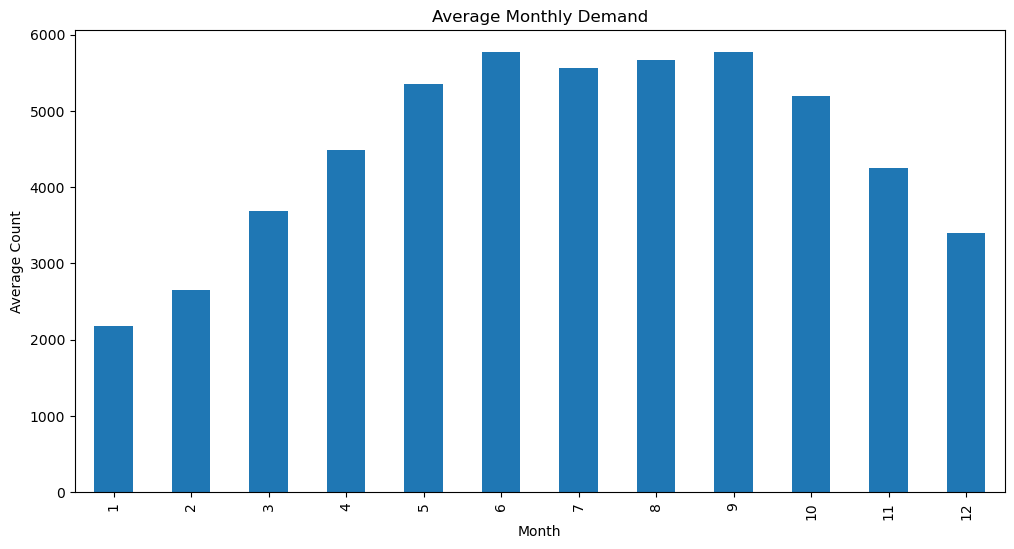

In [33]:
plt.figure(figsize=(12, 6))
df.groupby('month')['distribution'].mean().plot(kind='bar')
plt.title('Average Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.show()